In [13]:
import numpy as np
import pandas as pd
from sklearn import metrics 
df = pd.read_csv("dataset_clean.csv")
value =['Stress_Level','Sleep_Hours_Per_Day']
df

,Student_ID,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Stress_Level,social_ind,Stress_ind
0,1,3.8,38,2,1,1
1,2,3.5,31,1,1,1
2,3,3.9,5,1,1,1
3,4,2.1,23,2,1,1
4,5,0.6,16,0,1,1
...,...,...,...,...,...,...
1995,1996,0.2,5,2,1,1
1996,1997,2.8,5,2,1,1
1997,1998,0.0,5,2,1,1
1998,1999,0.7,27,0,1,1


In [14]:
len(df)

2000

In [15]:
df.shape

(2000, 6)

In [16]:
df.head()

,Student_ID,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Stress_Level,social_ind,Stress_ind
0,1,3.8,38,2,1,1
1,2,3.5,31,1,1,1
2,3,3.9,5,1,1,1
3,4,2.1,23,2,1,1
4,5,0.6,16,0,1,1


In [17]:
df.tail()

,Student_ID,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Stress_Level,social_ind,Stress_ind
1995,1996,0.2,5,2,1,1
1996,1997,2.8,5,2,1,1
1997,1998,0.0,5,2,1,1
1998,1999,0.7,27,0,1,1
1999,2000,1.7,24,0,1,1


In [18]:
df.describe()

,Student_ID,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Stress_Level,social_ind,Stress_ind
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.0
mean,1000.500000,1.990100,13.48000,0.822500,1.0,1.0
std,577.494589,1.155855,13.80601,0.905762,0.0,0.0
min,1.000000,0.000000,0.00000,0.000000,1.0,1.0
25%,500.750000,1.000000,5.00000,0.000000,1.0,1.0
50%,1000.500000,2.000000,5.00000,0.000000,1.0,1.0
75%,1500.250000,3.000000,20.00000,2.000000,1.0,1.0
max,2000.000000,4.000000,51.00000,2.000000,1.0,1.0


In [19]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df
# Using LabelEncoder to convert categorical string values into numeric values for all columns in the DataFrame.
# The 'apply' method is used to apply the LabelEncoder's fit_transform function to each column of the DataFrame, converting strings to integers.
# This helps prepare the data for machine learning models that require numerical input.

,Student_ID,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Stress_Level,social_ind,Stress_ind
0,0,38,38,2,0,0
1,1,35,31,1,0,0
2,2,39,5,1,0,0
3,3,21,23,2,0,0
4,4,6,16,0,0,0
...,...,...,...,...,...,...
1995,1995,2,5,2,0,0
1996,1996,28,5,2,0,0
1997,1997,0,5,2,0,0
1998,1998,7,27,0,0,0


In [20]:
feature_cols=['Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day','Stress_Level']
X=df[feature_cols]
y=df.Stress_Level
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=100)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
# Define the feature columns and target variable for classification.
# 'X' consists of the features: 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', and 'Stress_Level'.
# 'y' is the target variable: 'Stress_Level'.
# Splitting the dataset into training and testing sets using train_test_split with 30% of data for testing.
# A DecisionTreeClassifier with entropy criterion and a fixed random state is initialized and trained on the training set.
# The trained model predicts the target values on the test set.
# Finally, the accuracy of the model is evaluated by comparing the predicted values to the actual test values using accuracy_score.

Accuracy: 1.0


In [21]:
data_p=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
# Creating a DataFrame 'data_p' containing two columns: 'Actual' and 'Predicted'.
# The 'Actual' column holds the true values of the target variable (y_test), & the 'Predicted' column contains the values predicted by the model 
#(y_pred).
# This DataFrame allows for a side-by-side comparison of the actual vs. predicted values.
data_p

,Actual,Predicted
1799,2,2
733,0,0
1516,0,0
233,2,2
1028,0,0
...,...,...
657,0,0
1972,0,0
416,2,2
635,2,2


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[303   0   0]
 [  0  82   0]
 [  0   0 215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00       215

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\nentropy = 1.434\nsamples = 1400\nvalue = [726, 215, 459]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 726\nvalue = [726, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 1.5\nentropy = 0.903\nsamples = 674\nvalue = [0, 215, 459]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 215\nvalue = [0, 215, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 459\nvalue = [0, 0, 459]')]

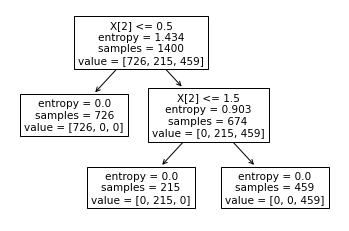

In [23]:
from sklearn import tree
tree.plot_tree(classifier)
# Visualizing the decision tree using the plot_tree function from the sklearn.tree module.
# This generates a plot of the decision tree classifier, showing the splits, features, and decision criteria at each node.
# It helps in understanding how the classifier makes its decisions based on the training data.

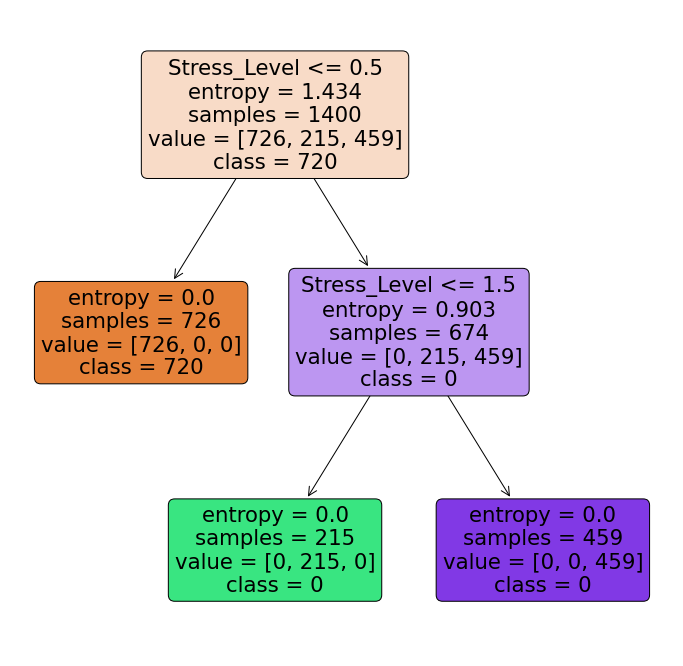

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 12))
plot_tree(
    classifier,  # Ensure 'classifier' is your trained DecisionTreeClassifier object
    filled=True,
    feature_names=X.columns.tolist(),  # Replace 'value' with the correct feature names
    class_names=['720','0', '0'],  # Update if your class labels are different
    rounded=True
)
plt.show()
